In [1]:
import numpy as np
from python_speech_features import mfcc
from scipy.io import wavfile
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from sklearn import mixture

In [2]:
frequency, wave = wavfile.read("agua.wav")
transcription = "agua"

In [3]:
mfccs = mfcc(wave)
mfccs.shape

(165, 13)

In [4]:
num_clusters = len(set(transcription)) + 1
num_clusters

4

In [5]:
bgmm = mixture.BayesianGaussianMixture(n_components=num_clusters)


In [6]:
bgmm.fit(mfccs)

BayesianGaussianMixture(covariance_prior=None, covariance_type='full',
                        degrees_of_freedom_prior=None, init_params='kmeans',
                        max_iter=100, mean_precision_prior=None,
                        mean_prior=None, n_components=4, n_init=1,
                        random_state=None, reg_covar=1e-06, tol=0.001,
                        verbose=0, verbose_interval=10, warm_start=False,
                        weight_concentration_prior=None,
                        weight_concentration_prior_type='dirichlet_process')

In [10]:
results = bgmm.predict(mfccs)
results

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 3,
       3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3])

In [11]:
magma = get_cmap("viridis")
colors_array = magma(np.linspace(0,1,num_clusters))
colors_array[:,-1] = 0.5
colors_array

array([[0.267004, 0.004874, 0.329415, 0.5     ],
       [0.190631, 0.407061, 0.556089, 0.5     ],
       [0.20803 , 0.718701, 0.472873, 0.5     ],
       [0.993248, 0.906157, 0.143936, 0.5     ]])

In [12]:
wave_mfcc_ratio = wave.shape[0] / results.shape[0]
wave_mfcc_ratio

161.35757575757575

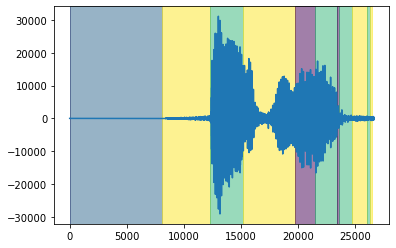

In [13]:
plt.plot(wave)
current_label = 0
current_index = 0
for index, label in enumerate(results):
    if label!= current_label:
        plt.axvspan(current_index,index*wave_mfcc_ratio, color=colors_array[current_label])
        current_label = label
        current_index = index*wave_mfcc_ratio
plt.axvspan(current_index,index*wave_mfcc_ratio, color=colors_array[current_label])
plt.savefig("bgmm.png")